In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/drive/MyDrive/python_g.colab/Membuat Portofolio/Analysis of Bank Marketing Campaign Outcomes/data1_campaign.csv')

In [4]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit_status,category_age
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Senior
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Mature
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Adult
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Mature
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Senior
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Retired
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,Retired
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,Senior


In [5]:
data.shape

(45211, 18)

In [6]:
# labeling
data['label'] = data['deposit_status'].apply(lambda x: 1 if x =='yes' else 0)

In [7]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit_status,category_age,label
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Senior,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Mature,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Adult,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Mature,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Senior,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Retired,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,Retired,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,Senior,0


check data distribution

In [8]:
X_encoded = pd.get_dummies(data.drop(columns=['label', 'deposit_status']))

In [9]:
numerical_cols = X_encoded.select_dtypes(include=['int64', 'float64']).columns

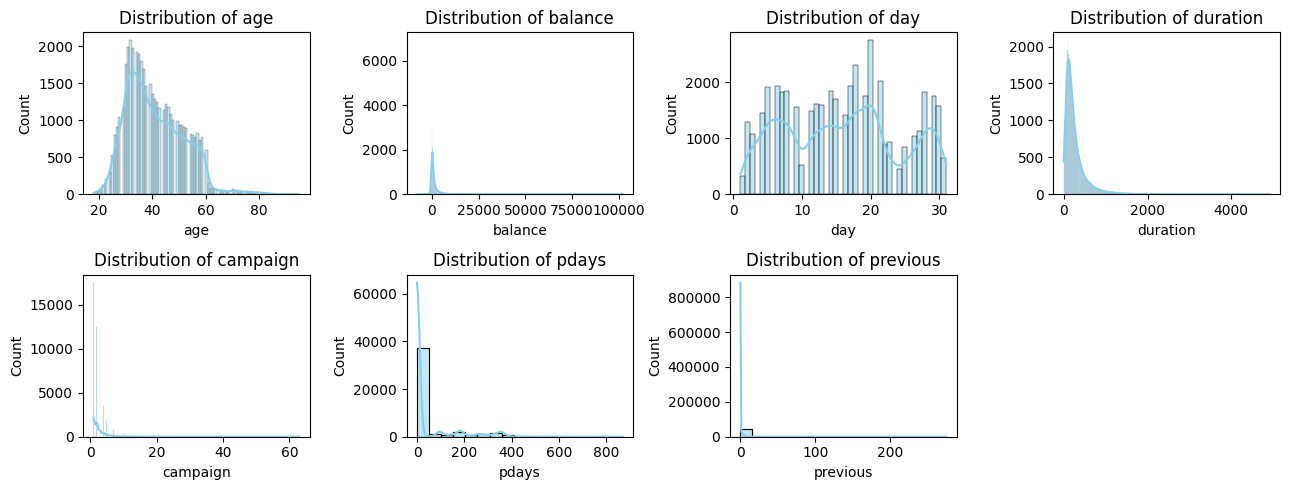

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur ukuran plot: misal 2 baris × 4 kolom
fig, axes = plt.subplots(2, 4, figsize=(13, 5))
axes = axes.flatten()

# Loop dan tampilkan histogram + KDE untuk tiap kolom numerik
for i, col in enumerate(numerical_cols[:8]):  # max 8 kolom biar muat
    sns.histplot(X_encoded[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

# Hapus subplot kosong (kalau jumlah kolom < 8)
for j in range(i + 1, 8):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

check 10 features with Random Forest

In [11]:
X = data.drop(columns=['deposit_status', 'label'])  # Input features
y = data['label']  # Target output

In [12]:
X_encoded = pd.get_dummies(X) #convert categorical to numeric (1, 0)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [14]:
# Training model random forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
feat_importance = pd.DataFrame({
    'Fitur': X_encoded.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [16]:
print(feat_importance.head(10))

               Fitur  Importance
3           duration    0.256975
1            balance    0.088892
0                age    0.080422
2                day    0.076925
49  poutcome_success    0.047388
4           campaign    0.037069
5              pdays    0.036441
6           previous    0.020790
29       housing_yes    0.013974
35         month_apr    0.012823


/tmp/ipython-input-17-2408636162.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Fitur', data=feat_importance.head(10), palette="viridis")


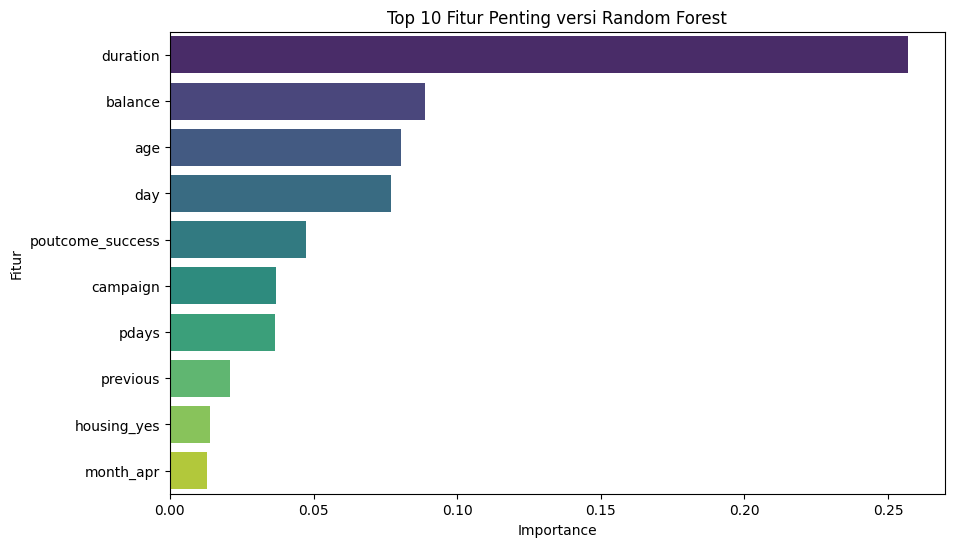

In [17]:
# show fitur
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Fitur', data=feat_importance.head(10), palette="viridis")
plt.title('Top 10 Fitur Penting versi Random Forest')
plt.show()

##Model Random Forest

In [18]:
features = ['duration', 'balance', 'age', 'day', 'poutcome_success', 'campaign', 'pdays', 'previous', 'housing_no', 'month_apr']

In [19]:
X = X_encoded[features]
y = data['label']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.60      0.38      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.76      0.67      0.70      9043
weighted avg       0.88      0.90      0.88      9043



In [24]:
# results confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [25]:
cm

array([[7681,  271],
       [ 678,  413]])

In [26]:
tp = cm[1, 1]  # True Positif
fp = cm[0, 1]  # False Positif
fn = cm[1, 0]  # False Negatif
tn = cm[0, 0]  # True Negatif

# Show results
print("True Positif = ", tp, "\nFalse Positif = ", fp, "\nFalse Negatif = ", fn, "\nTrue Negatif = ", tn)

True Positif =  413 
False Positif =  271 
False Negatif =  678 
True Negatif =  7681


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

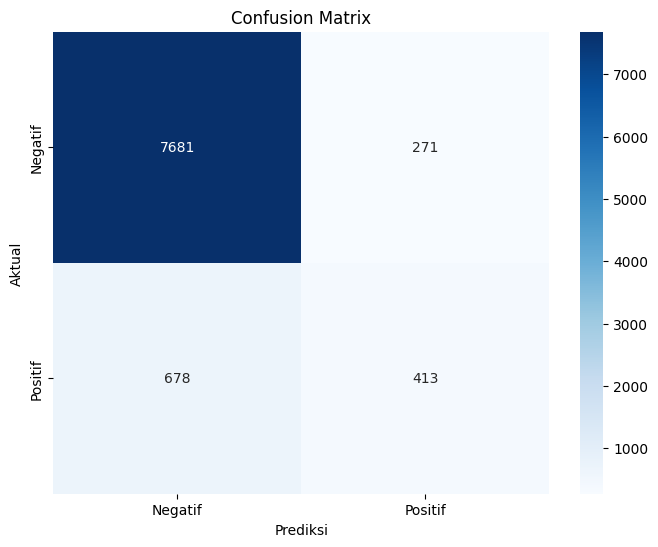

In [28]:
# Show a confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.title('Confusion Matrix')
plt.show()